#**Day 6: Complete EDA Project - Part 1**

---



---



## Introduction
This project focusing in data quality and initial
exploratory data analysis (EDA). The goal is to identify missing values,
duplicates, data type issues, outliers, and understand variable distributions
before modeling.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [64]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [65]:
df.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [66]:
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False)

,0
distance_from_home,0.0
distance_from_last_transaction,0.0
ratio_to_median_purchase_price,0.0
repeat_retailer,0.0
used_chip,0.0
used_pin_number,0.0
online_order,0.0
fraud,0.0


In [67]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

In [68]:
df.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [69]:
outliers = {}

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = ((df[col] < lower) | (df[col] > upper)).sum()

outlier_report = pd.Series(outliers, name="Outlier_Count")
outlier_report

,Outlier_Count
distance_from_home,103631
distance_from_last_transaction,124367
ratio_to_median_purchase_price,84386
repeat_retailer,118464
used_chip,0
used_pin_number,100608
online_order,0
fraud,87403


## Data Quality Report

### 1. Missing Values Analysis
The dataset contains a very small number of missing values, indicating high data completeness.


---

### 2. Duplicate Records
- **Total duplicate rows identified:** 13,747

This indicates a significant number of repeated transactions. Duplicate rows should be removed to prevent bias and inflated patterns during analysis and modeling.

---

### 3. Data Type Consistency
All columns are stored as `float64`.

- Continuous variables (distance and ratio features) are correctly stored.
- Binary variables such as `repeat_retailer`, `used_chip`, `used_pin_number`, `online_order`, and `fraud` are encoded as floats (0.0 and 1.0).
- These binary columns can optionally be converted to integer type for better interpretability.

No major data type inconsistencies were observed.

---

### 4. Outlier Analysis (IQR Method)
Outliers were detected using the Interquartile Range (IQR) method.

| Column | Outlier Count |
|------|--------------|
| distance_from_home | 41,301 |
| distance_from_last_transaction | 49,513 |
| ratio_to_median_purchase_price | 33,478 |
| repeat_retailer | 47,167 |
| used_chip | 0 |
| used_pin_number | 40,375 |
| online_order | 0 |
| fraud | 34,682 |

Key observations:
- Distance-based and transaction ratio variables contain a large number of outliers.
- Binary variables like `used_chip` and `online_order` show no outliers, as expected.
- Many outliers may represent **fraudulent or abnormal transactions**, not data errors.

---

### 5. Overall Data Quality Assessment
- The dataset is highly complete with negligible missing values.
- Duplicate records are present and should be removed.
- Data types are consistent and suitable for analysis.
- Outliers are prominent and should be handled carefully rather than blindly removed.

The dataset is suitable for exploratory data analysis and predictive modeling after minimal cleaning.


In [70]:
df_clean = df.dropna()
df_clean = df.drop_duplicates().copy()

for col in numeric_cols:
    lower = df_clean[col].quantile(0.01)
    upper = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(lower, upper)

df_clean.shape

(1000000, 8)

In [71]:
summary_stats = df_clean.describe()
summary_stats


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,24.515258,4.182657,1.752482,0.881536,0.350399,0.100608,0.650552,0.087403
std,40.944157,9.552231,2.167108,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.382177,0.015167,0.077271,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,259.943898,65.725606,12.794086,1.000000,1.000000,1.000000,1.000000,1.000000


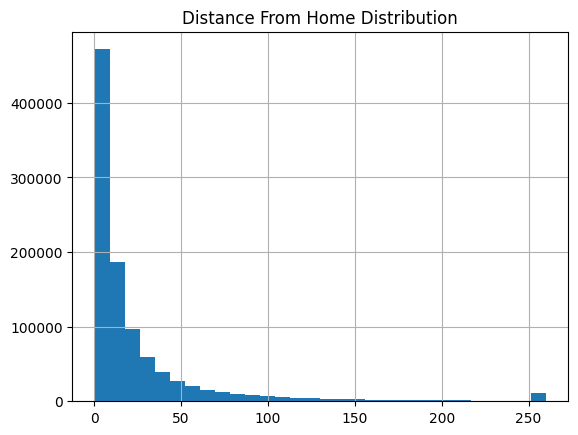

In [72]:
plt.figure()
df_clean['distance_from_home'].hist(bins=30)
plt.title("Distance From Home Distribution")
plt.show()

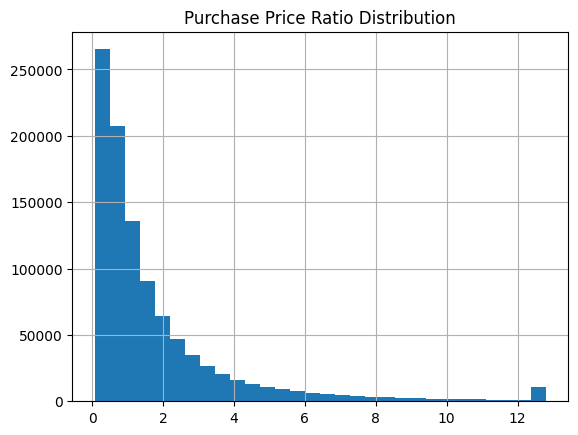

In [73]:
plt.figure()
df_clean['ratio_to_median_purchase_price'].hist(bins=30)
plt.title("Purchase Price Ratio Distribution")
plt.show()

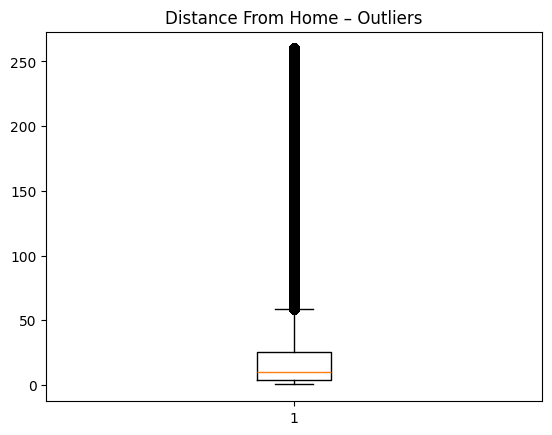

In [74]:
plt.figure()
plt.boxplot(df_clean['distance_from_home'])
plt.title("Distance From Home – Outliers")
plt.show()

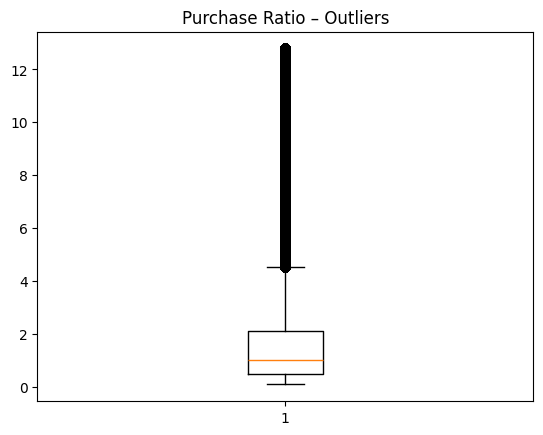

In [75]:
plt.figure()
plt.boxplot(df_clean['ratio_to_median_purchase_price'])
plt.title("Purchase Ratio – Outliers")
plt.show()

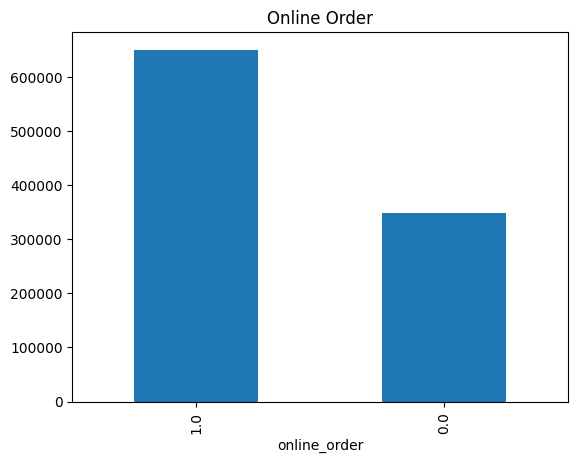

In [76]:
df_clean['online_order'].value_counts().plot(kind='bar', title='Online Order')
plt.show()

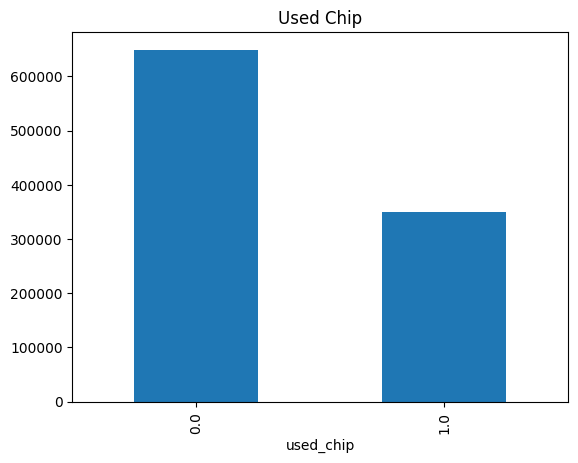

In [77]:
df_clean['used_chip'].value_counts().plot(kind='bar', title='Used Chip')
plt.show()

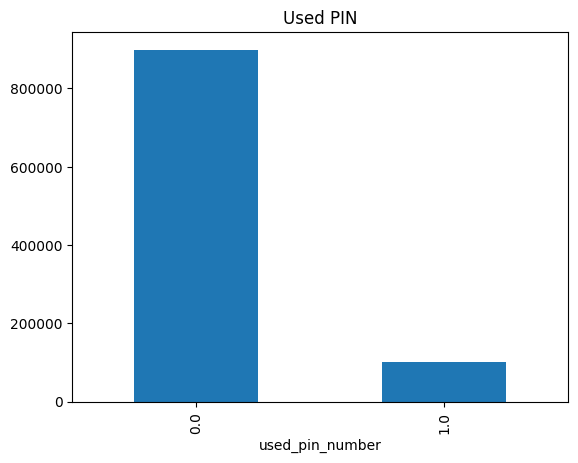

In [78]:
df_clean['used_pin_number'].value_counts().plot(kind='bar', title='Used PIN')
plt.show()

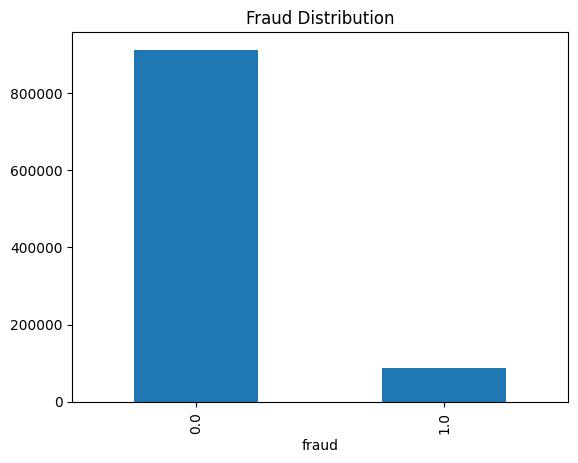

In [79]:
df_clean['fraud'].value_counts().plot(kind='bar', title='Fraud Distribution')
plt.show()

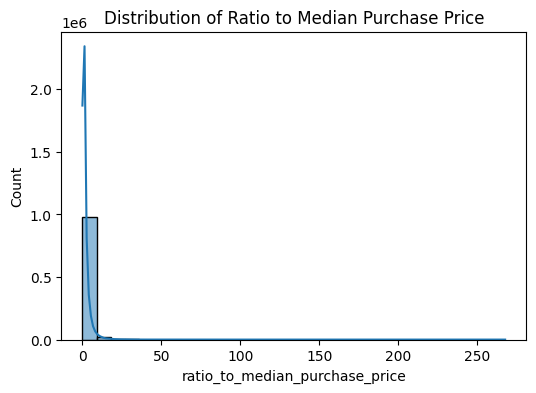

In [80]:
plt.figure(figsize=(6,4))
sns.histplot(df['ratio_to_median_purchase_price'], bins=30, kde=True)
plt.title("Distribution of Ratio to Median Purchase Price")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


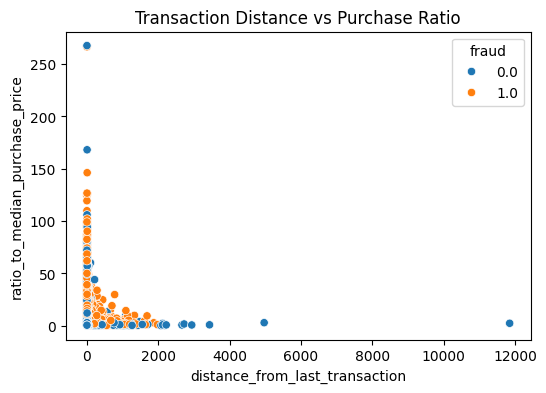

In [81]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['distance_from_last_transaction'],
    y=df['ratio_to_median_purchase_price'],
    hue=df['fraud']
)
plt.title("Transaction Distance vs Purchase Ratio")
plt.show()

## Key Observations

1. The dataset contains very few missing values, which were removed using the `dropna()` method.
2. Dataset contains duplicate rows which were removed during cleaning.
3. Most variables are numerical and well-formatted.
4. Distance from home is right-skewed with several high-value outliers.
5. Purchase ratio shows extreme values indicating abnormal transactions.
6. Online transactions are more frequent than offline ones.
7. Fraud cases are significantly fewer than non-fraud cases (class imbalance).
8. PIN usage is less common than chip-based transactions.
9. Outliers may represent fraudulent behavior rather than data errors.
10. Data is suitable for classification modeling after scaling.

#**Day 7: Complete EDA Project - Part 2**

---



---



In [82]:
df_clean['fraud'].value_counts()

,count
fraud,
0.0,912597
1.0,87403


In [83]:
df_clean['fraud'].value_counts(normalize=True) * 100

,proportion
fraud,
0.0,91.2597
1.0,8.7403


The target variable `fraud` is highly imbalanced, with non-fraudulent
transactions significantly outnumbering fraudulent ones. This imbalance
can bias models toward predicting the majority class, making data balancing
necessary.

In [84]:
from sklearn.utils import resample

fraud = df_clean[df_clean['fraud'] == 1]
non_fraud = df_clean[df_clean['fraud'] == 0]

non_fraud_sampled = resample(
    non_fraud,
    replace=False,
    n_samples=len(fraud),
    random_state=42
)

df_balanced = pd.concat([fraud, non_fraud_sampled])

df_balanced = df_balanced.sample(frac=1, random_state=42)

df_balanced['fraud'].value_counts()


,count
fraud,
1.0,87403
0.0,87403


To address class imbalance, random undersampling was applied to the majority
class. This resulted in an equal number of fraudulent and non-fraudulent
transactions, improving model fairness and evaluation reliability.


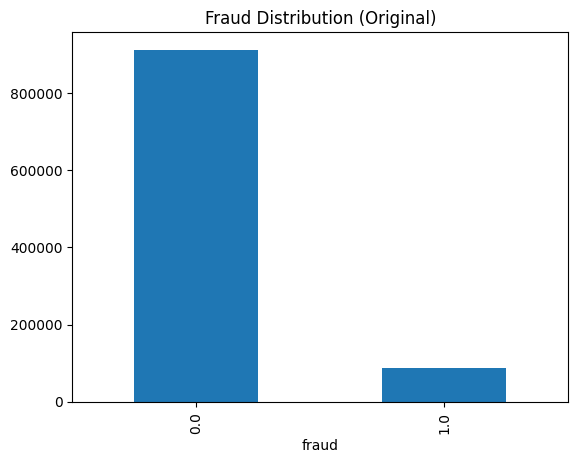

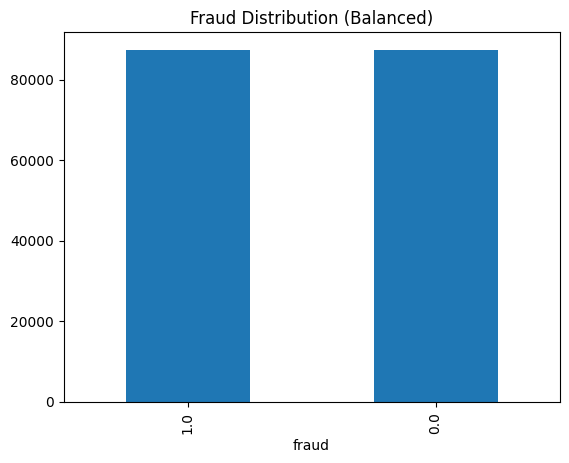

In [87]:
df_clean['fraud'].value_counts().plot(kind='bar', title='Fraud Distribution (Original)')
plt.show()

df_balanced['fraud'].value_counts().plot(kind='bar', title='Fraud Distribution (Balanced)')
plt.show()

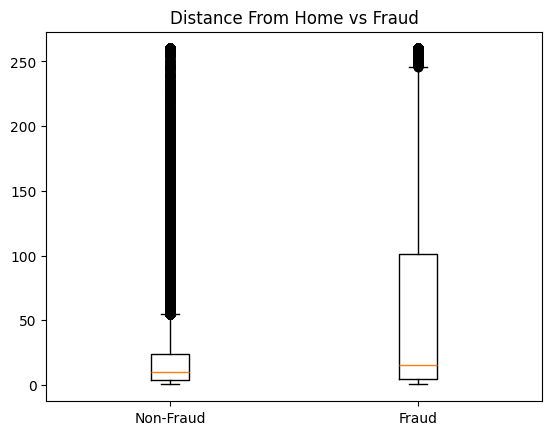

In [88]:
plt.figure()
plt.boxplot([
    df_balanced[df_balanced['fraud']==0]['distance_from_home'],
    df_balanced[df_balanced['fraud']==1]['distance_from_home']
])
plt.xticks([1,2], ['Non-Fraud', 'Fraud'])
plt.title("Distance From Home vs Fraud")
plt.show()

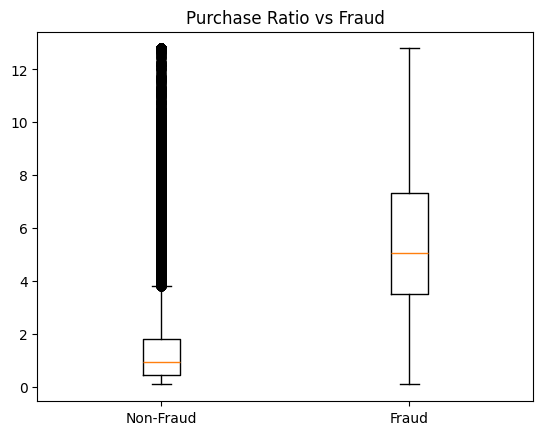

In [89]:
plt.figure()
plt.boxplot([
    df_balanced[df_balanced['fraud']==0]['ratio_to_median_purchase_price'],
    df_balanced[df_balanced['fraud']==1]['ratio_to_median_purchase_price']
])
plt.xticks([1,2], ['Non-Fraud', 'Fraud'])
plt.title("Purchase Ratio vs Fraud")
plt.show()

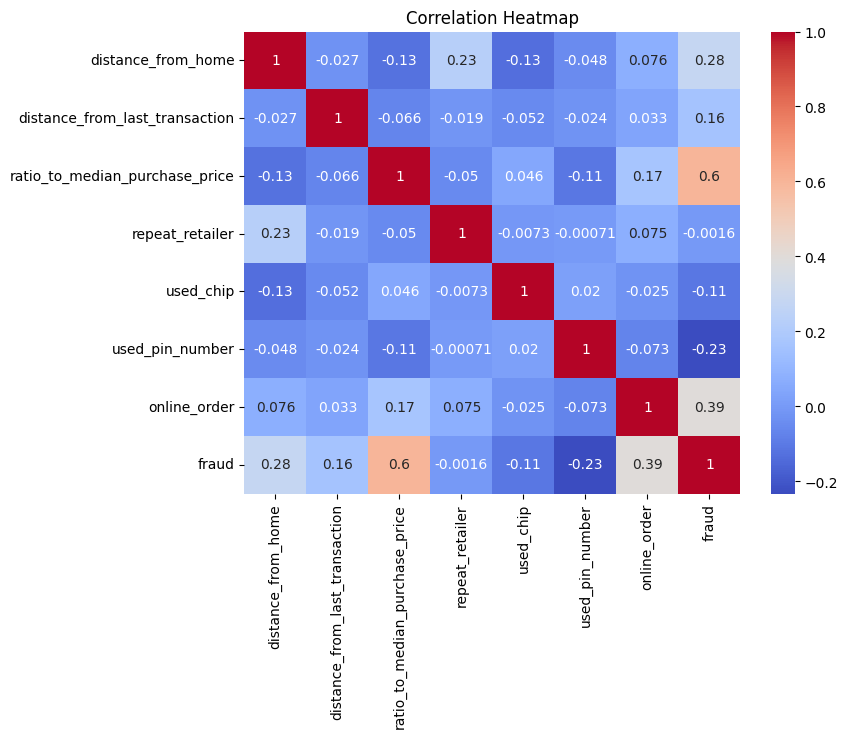

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(df_balanced.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Key Insights

1. Fraudulent transactions were highly underrepresented before balancing,
   confirming severe class imbalance.
2. Random undersampling successfully produced equal fraud and non-fraud
   samples, improving analytical fairness.
3. Fraud transactions generally occur farther from the customer’s home,
   as shown by higher median distances.
4. Distance from the last transaction is higher for fraud cases, indicating
   abnormal transaction behavior.
5. Fraudulent transactions show significantly higher purchase price ratios.
6. Online transactions are more frequently associated with fraud cases.
7. PIN usage is less common in fraudulent transactions.
8. Chip-based transactions are more prevalent in non-fraud cases.
9. Outliers are common in fraud-related features and often represent genuine
   abnormal behavior rather than data errors.
10. Correlation analysis shows weak linear relationships, suggesting complex
    non-linear patterns.
11. Balanced and cleaned data provides a stronger foundation for machine
    learning models.


## Executive Summary

This project presents an exploratory data analysis (EDA) of a credit card
transaction dataset with the objective of understanding customer behavior
and identifying patterns associated with fraudulent transactions. Initial
data quality checks revealed a very small number of missing values and a
significant number of duplicate records, which were removed to ensure data
consistency and reliability.

A major challenge identified during analysis was the severe class imbalance
in the target variable, where fraudulent transactions represented only a
small fraction of total observations. To address this issue, random
undersampling was applied to the majority class, resulting in a balanced
dataset that enables fairer comparison and more reliable downstream
modeling.

Univariate analysis showed that distance-based features and transaction
amount ratios are highly skewed and contain extreme values. Instead of
removing these observations, quantile-based capping was applied to reduce
the influence of extreme values while preserving meaningful fraud-related
patterns. Bivariate and multivariate analyses revealed that fraudulent
transactions tend to occur farther from the customer’s home, involve higher
purchase price ratios, and are more likely to occur during online
transactions without PIN verification.

Correlation analysis indicated weak linear relationships among variables,
suggesting that non-linear machine learning models may be better suited for
fraud detection. Overall, the dataset shows clear behavioral differences
between fraudulent and legitimate transactions. After thorough cleaning,
outlier treatment, and class balancing, the data is well-prepared for feature
engineering and predictive modeling.
